In [15]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [16]:
df = pd.read_csv('diabetes.csv')

In [17]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
df.isnull().sum()/100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [19]:
x = df.drop(columns='Outcome')
y = df['Outcome']

In [20]:
ss = StandardScaler()

In [21]:
x_scaled = ss.fit_transform(x)

In [22]:
x_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred = lr.predict(x_test)

In [29]:
accuracy_score(y_pred,y_test)

0.7792207792207793

In [30]:
lr.predict_proba(x_test)

array([[0.56433966, 0.43566034],
       [0.68073915, 0.31926085],
       [0.84693342, 0.15306658],
       [0.95599701, 0.04400299],
       [0.79735397, 0.20264603],
       [0.7377323 , 0.2622677 ],
       [0.63303665, 0.36696335],
       [0.89729665, 0.10270335],
       [0.855574  , 0.144426  ],
       [0.81487583, 0.18512417],
       [0.54558636, 0.45441364],
       [0.92949452, 0.07050548],
       [0.0149172 , 0.9850828 ],
       [0.25106228, 0.74893772],
       [0.9675129 , 0.0324871 ],
       [0.24898554, 0.75101446],
       [0.77704077, 0.22295923],
       [0.69008365, 0.30991635],
       [0.88051365, 0.11948635],
       [0.8430155 , 0.1569845 ],
       [0.60252808, 0.39747192],
       [0.85507407, 0.14492593],
       [0.03501634, 0.96498366],
       [0.7242831 , 0.2757169 ],
       [0.9323429 , 0.0676571 ],
       [0.59963316, 0.40036684],
       [0.81151946, 0.18848054],
       [0.21594914, 0.78405086],
       [0.91999386, 0.08000614],
       [0.4814564 , 0.5185436 ],
       [0.

In [34]:
cm = confusion_matrix(y_pred,y_test)

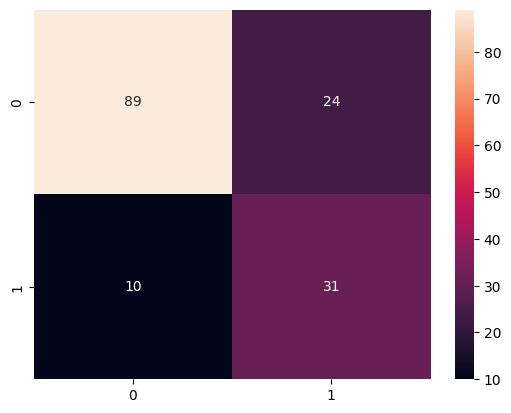

In [38]:
sns.heatmap(cm,annot=True);

In [39]:
auc = roc_auc_score(y_pred,y_test)
auc

0.7718540902223182

fpr [0.        0.1010101 1.       ]
tpr [0.         0.56363636 1.        ]


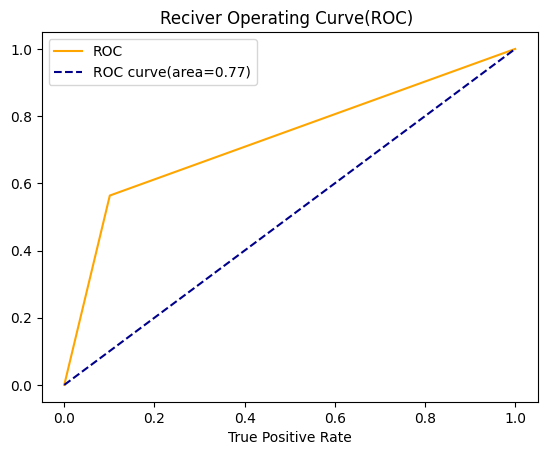

In [47]:
fpr , tpr , thresholds = roc_curve(y_test,y_pred)
print('fpr',fpr)
print('tpr',tpr)
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Reciver Operating Curve(ROC) ')

plt.legend();